# Exploring Data using DecisionTreeClassifier
    - Exploring decision tree for a better model.

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [6]:
#read the dataset
train = pd.read_csv("../../data/training_values.csv")
target = pd.read_csv("../../data/training_labels.csv")

In [7]:
#getting the first ten rows of the train data.
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
#getting the first ten rows of the target data.
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [9]:
# merge both the train dataset and target dataset
water_df = target.merge(train, left_on ='id', right_on ='id')
water_df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [10]:
#reset the index to the id.
water_df.index = water_df['id']


In [11]:
#then drop id from the columns
water_df = water_df.drop('id',axis =1)
water_df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [12]:
#binary encoding our target columns
status_group_new = {'functional':1,'non functional':0, 'functional needs repair': 0}
water_df['status_group'] = water_df['status_group'].replace(status_group_new)

In [13]:
water_df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,1,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,1,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,1,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [14]:
#dropping duplicate columns to avoid overfitting.
water_df = water_df.drop(['waterpoint_type_group','recorded_by','payment_type','management_group','quantity_group','scheme_management','ward'], axis =1)
water_df

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,extraction_type_class,management,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,
69572,1,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,gravity,vwc,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe
8776,1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe
34310,1,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,gravity,vwc,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple
67743,0,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple
19728,1,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,1,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,gravity,water board,pay per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe
27263,1,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,gravity,vwc,pay annually,soft,good,enough,river,river/lake,surface,communal standpipe
37057,1,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,handpump,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump


In [15]:
# define X and Y
X = water_df.drop(['status_group'], axis =1)
y = water_df['status_group']

X.shape, y.shape

((59400, 32), (59400,))

In [16]:
#checking the weight of the class
y.value_counts(normalize=True)

1    0.543081
0    0.456919
Name: status_group, dtype: float64

Looking at the value counts of our target you will see that the class is balanced. Functional is at 54% and non Functional is 46%.

In [17]:
#holdout set
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.10,random_state=42)

#training set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20,random_state=42)

In [18]:
num_cols = []
ohe_cols = []
freq_cols =[]

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        num_cols.append(col)
    elif X[col].nunique() < 10:
        ohe_cols.append(col)
    else:
        freq_cols.append(col)

In [19]:
#print the list of numerical columns,categorical columns and frequency columns
print(f"list of numerical columns: {num_cols}")
print("--")
print(f"list of categorical columns:{ohe_cols}")
print("--")
print(f"list of Frequency columns:{freq_cols}")

list of numerical columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
--
list of categorical columns:['basin', 'public_meeting', 'permit', 'extraction_type_class', 'payment', 'water_quality', 'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type']
--
list of Frequency columns:['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management', 'source']


In [20]:
#Using pipeline to preprocess our data
#steps
# scale the numerical columns
# for the categorical and frequency columns,
#use the imputer to fill value for null, then oneHotEncode the column

num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value= 0,)),
    ('oh_encoder', OneHotEncoder(drop='first',handle_unknown= 'error'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value= np.nan))
])


# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'num_private', 'region_code',
                                  'district_code', 'population',
                                  'construction_year']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['basi...
                                  'waterpoint_type']),
                                ('freq',
                                 Pipeline(steps=[('fr

In [21]:
#training our model and cross validating using the default cv=5
dec_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])


cross_validate(dec_tree, X_train, y_train, return_train_score=True)

{'fit_time': array([0.9335382 , 0.9414022 , 0.95167899, 0.95963693, 0.92516613]),
 'score_time': array([0.11825275, 0.089329  , 0.12118483, 0.09240389, 0.11959696]),
 'test_score': array([0.7699322 , 0.75496844, 0.7566051 , 0.76955454, 0.77025605]),
 'train_score': array([0.9992693 , 0.99938622, 0.99918162, 0.99921087, 0.9992401 ])}

The accuracy score shows that the model is overfitting, will go ahead and use the Gridsearch to tune the tree for best parameter.

In [22]:
#tuning the parameter and setting the criterion to entropy 
#balance the weight of the class
#check the fi score
param = [{ 
    'classifier__criterion':['gini','entropy'],
    'classifier__max_depth': [3,10,15],
    'classifier__min_samples_split':[5,20,100],
    'classifier__class_weight':['balanced']}]

grid = GridSearchCV(estimator = dec_tree,
                    param_grid = param, scoring='f1')

In [23]:
output = grid.fit(X_train,y_train)

In [24]:
#best parameter 
output.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 15,
 'classifier__min_samples_split': 5}

In [25]:
output.best_score_

0.7948889062431901

In [26]:
#comparing the best param using the precision score
#tuning the parameter and setting the criterion to entropy 
#balance the weight of the class
#check the precision

param = [{ 
    'classifier__criterion':['gini','entropy'],
    'classifier__max_depth': [3,10,15],
    'classifier__min_samples_split':[5,20,100],
    'classifier__class_weight':['balanced']}]

grid = GridSearchCV(estimator = dec_tree,
                    param_grid = param, scoring='precision')

In [27]:
output = grid.fit(X_train,y_train)

In [28]:
output.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 15,
 'classifier__min_samples_split': 5}

In [29]:
output.best_score_

0.7821858703690996

- Using different score the best parameter still shows the classifier with the max_depth of 15.

In [30]:
#predict the output of the best estimator
output.best_estimator_.fit(X_train,y_train)
preds_tr_best = output.best_estimator_.predict(X_train)
preds_te_best = output.best_estimator_.predict(X_test)

#Print the metrics to compare with other models
print("Training:")
print(f"Precision score: {precision_score(y_train,preds_tr_best)}")
print(f"Recall score: {recall_score(y_train,preds_tr_best)}")
print(f"F1 score: {f1_score(y_train,preds_tr_best)}")

print("---------------")

print("Test:")
print(f"Precision score: {precision_score(y_test,preds_te_best)}")
print(f"Recall score: {recall_score(y_test,preds_te_best)}")
print(f"F1 score: {f1_score(y_test,preds_te_best)}")

Training:
Precision score: 0.8648201902918884
Recall score: 0.9201698695950583
F1 score: 0.8916368775459308
---------------
Test:
Precision score: 0.7756169308710573
Recall score: 0.825391304347826
F1 score: 0.7997303900918359


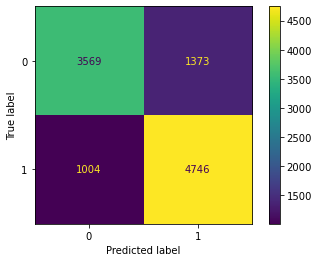

In [31]:
#plot the output on a confusion matrix
plot_confusion_matrix(output.best_estimator_,X_test,y_test)

In [32]:
pd.DataFrame(output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.682502,0.011831,0.102443,0.015376,balanced,gini,3,5,"{'classifier__class_weight': 'balanced', 'clas...",0.678082,0.677903,0.677386,0.670015,0.673847,0.675447,0.003124,16
1,0.689451,0.019217,0.104091,0.011889,balanced,gini,3,20,"{'classifier__class_weight': 'balanced', 'clas...",0.678082,0.677903,0.677386,0.670015,0.673847,0.675447,0.003124,16
2,0.688829,0.018605,0.103884,0.015851,balanced,gini,3,100,"{'classifier__class_weight': 'balanced', 'clas...",0.678082,0.677903,0.677386,0.670015,0.673847,0.675447,0.003124,16
3,0.829972,0.017732,0.102498,0.014029,balanced,gini,10,5,"{'classifier__class_weight': 'balanced', 'clas...",0.759969,0.764299,0.772840,0.756673,0.766103,0.763977,0.005524,7
4,0.823621,0.013871,0.102946,0.014943,balanced,gini,10,20,"{'classifier__class_weight': 'balanced', 'clas...",0.759817,0.763265,0.772567,0.756329,0.764456,0.763287,0.005440,8
5,0.828543,0.008595,0.103247,0.014901,balanced,gini,10,100,"{'classifier__class_weight': 'balanced', 'clas...",0.759647,0.759967,0.773889,0.753446,0.769105,0.763211,0.007312,9
6,0.905698,0.012919,0.102515,0.014585,balanced,gini,15,5,"{'classifier__class_weight': 'balanced', 'clas...",0.791195,0.774135,0.777222,0.783862,0.784517,0.782186,0.005981,1
7,0.898064,0.012133,0.102539,0.013864,balanced,gini,15,20,"{'classifier__class_weight': 'balanced', 'clas...",0.794541,0.771107,0.776527,0.784891,0.780503,0.781514,0.007941,3
8,0.863911,0.016287,0.101930,0.013355,balanced,gini,15,100,"{'classifier__class_weight': 'balanced', 'clas...",0.787136,0.768255,0.776989,0.774913,0.790105,0.779480,0.008057,5
9,0.673633,0.011473,0.100622,0.014115,balanced,entropy,3,5,"{'classifier__class_weight': 'balanced', 'clas...",0.678082,0.677903,0.677867,0.670015,0.673609,0.675495,0.003216,13


In [38]:
# from sklearn import tree
# import graphviz
# from sklearn.tree import export_graphviz
 
# dot = tree.export_graphviz(output.best_estimator_, 'tree_', out_file = None,
#                            filled =True,rounded= True,feature_names = X_train.columns)

# graph = graphviz.source(dot)
# graph

# Result

Based on the output of the estimators and a score of 78% on unseen data, we will combine all of our Decision trees model and vote for the best classifier, and evaluate for our final Model.